# Comparison of Radial Distribution Functions and orientational analysis

In [34]:
%reset -f
%load_ext autoreload
%autoreload 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rcParams.update({'font.size': 18})
from scipy.integrate import trapz, cumtrapz
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
def ratio(r, gO, gH):
    # Same V, nH = 2*nO
    cn_FeO = cumtrapz(r**2 * gO, dx=dr)
    cn_FeH = 2 * cumtrapz(r**2 * gH, dx=dr)
    return cn_FeH /cn_FeO

/tmp/ipykernel_5325/3233231076.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return cn_FeH /cn_FeO
/tmp/ipykernel_5325/3233231076.py:4: RuntimeWarning: invalid value encountered in true_divide
  return cn_FeH /cn_FeO


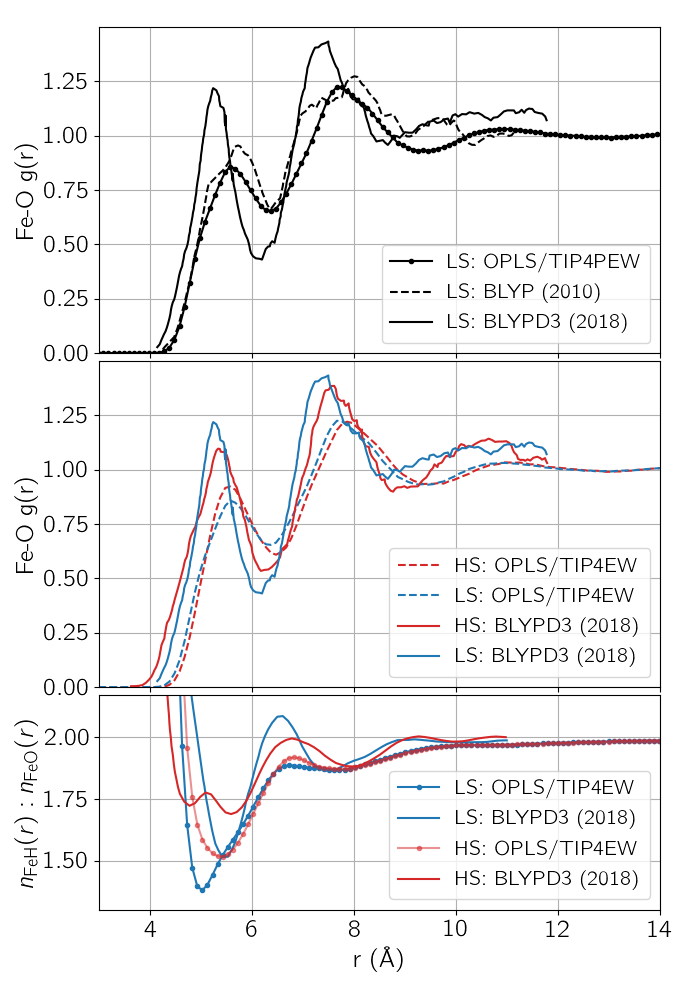

In [36]:
# Read data
rdf_opls_ls_feo = np.load('febpy_gs_opls_frznFe_u-O_v.npy')
rdf_opls_ls_feh = np.load('febpy_gs_opls_frznFe_u-H_v.npy')
rdf_opls_hs_feo = np.load('febpy_es_opls_frznFe_u-O_v.npy')
rdf_opls_hs_feh = np.load('febpy_es_opls_frznFe_u-H_v.npy')

daku2010_ls = np.genfromtxt('daku2010_febpy_FeO_LS.csv', delimiter=',')
daku2018_ls = np.genfromtxt('daku2018_febpy_FeO_LS.csv', delimiter=',')
daku2018_hs = np.genfromtxt('daku2018_febpy_FeO_HS.csv', delimiter=',')
da10_ratio_ls = np.genfromtxt('daku2010_febpy-ratio_LS.csv', delimiter=',')
da18_ratio_ls = np.genfromtxt('daku2018_febpy-ratio_LS.csv', delimiter=',')
da10_ratio_hs = np.genfromtxt('daku2010_febpy-ratio_HS.csv', delimiter=',')
da18_ratio_hs = np.genfromtxt('daku2018_febpy-ratio_HS.csv', delimiter=',')

sort = np.argsort(da10_ratio_ls[:, 0])
da10_ratio_ls = da10_ratio_ls[sort, :]
sort = np.argsort(da18_ratio_ls[:, 0])
da18_ratio_ls = da18_ratio_ls[sort, :]



# Make CN_H:CN_O Ratio from MM MD RDFs
r = rdf_opls_ls_feo[:, 0]
dr = r[1]-r[0]
opls_ratio_ls = ratio(r, rdf_opls_ls_feo[:, 1], rdf_opls_ls_feh[:, 1])
opls_ratio_hs = ratio(r, rdf_opls_hs_feo[:, 1], rdf_opls_hs_feh[:, 1])



sort = np.argsort(daku2010_ls[:, 0])
daku2010_ls = daku2010_ls[sort, :]

sort = np.argsort(daku2018_ls[:, 0])
daku2018_ls = daku2018_ls[sort, :]

sort = np.argsort(daku2018_hs[:, 0])
daku2018_hs = daku2018_hs[sort, :]


#fig, axes = plt.subplots(3, 1, figsize=(7, 12))
fig = plt.figure(figsize=(7, 10))
gs = fig.add_gridspec(8, 1)
ax1 = fig.add_subplot(gs[:3])
ax2 = fig.add_subplot(gs[3:6])
ax3 = fig.add_subplot(gs[6:8])
axes = (ax1, ax2, ax3)

ax = axes[0]
ax.plot(rdf_opls_ls_feo[:, 0], rdf_opls_ls_feo[:, 1], 'k.-', label='LS: OPLS/TIP4PEW')
ax.plot(daku2010_ls[:, 0], daku2010_ls[:, 1], 'k--', label='LS: BLYP (2010)')
ax.plot(daku2018_ls[:, 0], daku2018_ls[:, 1], 'k-',  label='LS: BLYPD3 (2018)')

ax = axes[1]
ax.plot(rdf_opls_hs_feo[:, 0], rdf_opls_hs_feo[:, 1], 'C3--', label='HS: OPLS/TIP4EW')
ax.plot(rdf_opls_ls_feo[:, 0], rdf_opls_ls_feo[:, 1], 'C0--', label='LS: OPLS/TIP4EW')
ax.plot(daku2018_hs[:, 0], daku2018_hs[:, 1], 'C3', label='HS: BLYPD3 (2018)')
ax.plot(daku2018_ls[:, 0], daku2018_ls[:, 1], 'C0',  label='LS: BLYPD3 (2018)')

  
ax = axes[-1]
ax.plot(r[1:] - 0.5 * dr, opls_ratio_ls, 'C0.-', label='LS: OPLS/TIP4EW')
ax.plot(da18_ratio_ls[:, 0], da18_ratio_ls[:, 1], 'C0-', label='LS: BLYPD3 (2018)')
ax.plot(r[1:] - 0.5 * dr, opls_ratio_hs, 'C3.-', label='HS: OPLS/TIP4EW', alpha=0.5)
ax.plot(da18_ratio_hs[:, 0], da18_ratio_hs[:, 1], 'C3-', label='HS: BLYPD3 (2018)')


ax.set_xlabel('r (Å)')
ax.set_ylim([1.3, 2.173])
ax.set_ylabel('$n_\mathrm{FeH}(r):n_\mathrm{FeO}(r)$')

for ax in axes[:-1]:
    ax.set_ylabel('Fe-O g(r)')
    ax.set_ylim([0, 1.49999])
    ax.set_xticklabels([])
    ax.legend(loc='best', fontsize=15)


for ax in axes:
    ax.grid('both')
    ax.set_xlim([3.0, 14])


ax.legend(loc='best', fontsize=15, ncol=1)
    
fig.tight_layout(h_pad=-0.2)
plt.savefig('fig7.pdf', bbox_inches='tight', dpi=300)